<p style="text-align: center; font-size: 20px;">𝐏𝐫𝐨𝐣𝐞𝐜𝐭: 𝐃𝐮̛̣ đ𝐨𝐚́𝐧 𝐜𝐡𝐢 𝐩𝐡𝐢́ 𝐛𝐚̉𝐨 𝐡𝐢𝐞̂̉𝐦</p>



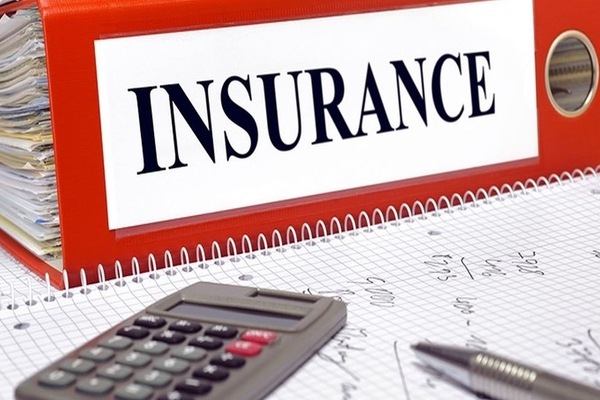

## Table of Contents
* 1.Introduction
* 2.Loading and Data Processing
* 3.Exploratory Data Analysis(EDA)
* 4.Feature Engineering & Data Wrangling
* 5.Model Training

## Introduction
* Age: age of primary beneficiary
* Sex: insurance contractor gender, female, male
* BMI: Body mass index, providing an understanding of body, ideally 18.5 to 24.9
* Children: Number of children covered by health insurance / Number of dependents
* Smoker: Smoking
* Region: the beneficiary's residential area in the US 
* Charges: Individual medical costs billed by health insurance

Data from kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

##  Loading and Data Processing

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data from csv
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

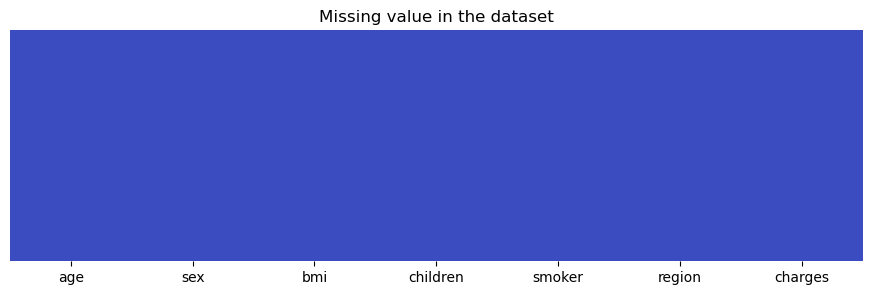

In [5]:
# checking for missing values
plt.figure(figsize=(11,3))
sns.heatmap(insurance.isnull(),cbar=False,cmap='coolwarm',yticklabels=False)
plt.title('Missing value in the dataset');

In [6]:
# statistical Measures of the dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


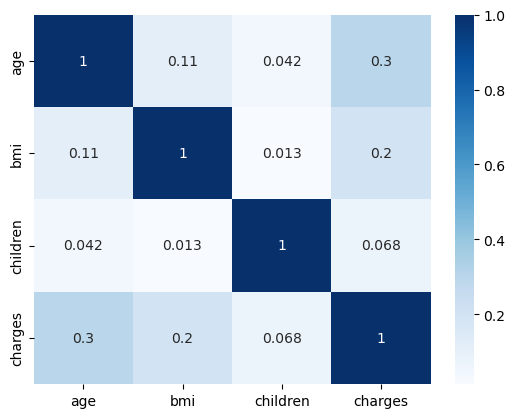

In [7]:
# correlation plot
corr = insurance.corr()
sns.heatmap(corr, cmap = "Blues", annot= True);

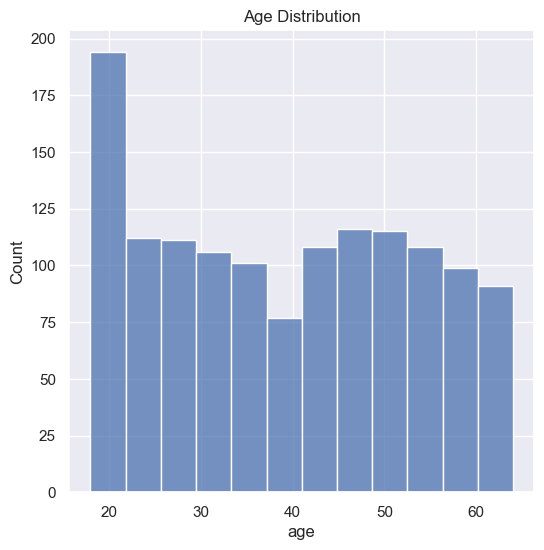

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6, 6))
sns.histplot(insurance['age'])
plt.title('Age Distribution')
plt.show()

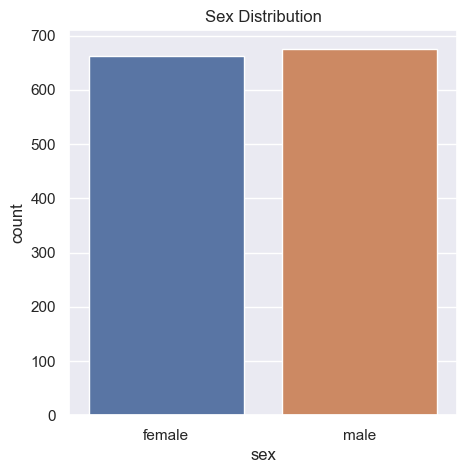

In [9]:
# Sex column
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

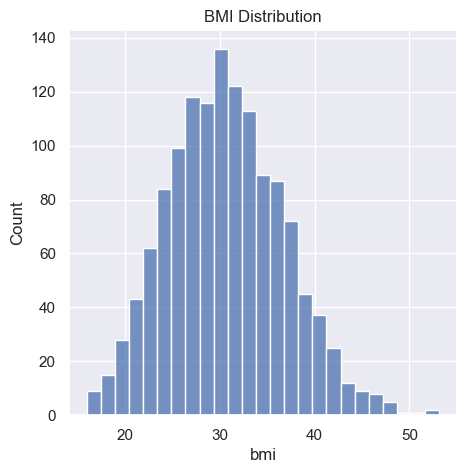

In [11]:
# bmi distribution
plt.figure(figsize=(5,5))
sns.histplot(insurance['bmi'])
plt.title('BMI Distribution')
plt.show()

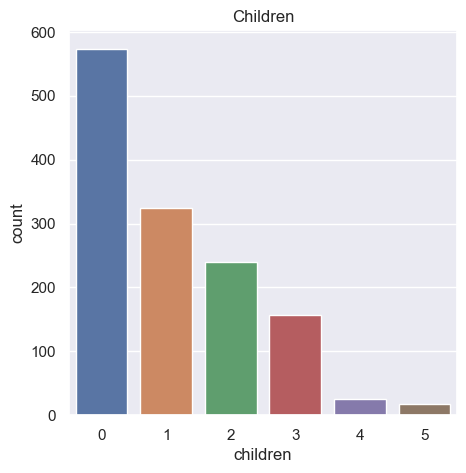

In [14]:
# children column
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=insurance)
plt.title('Children')
plt.show()

In [15]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

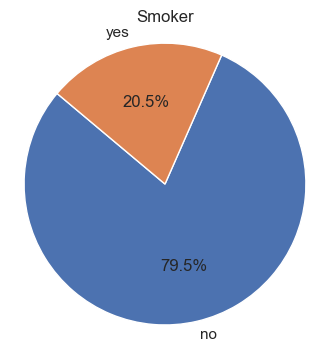

In [16]:
# smoker column
smoker_counts = insurance['smoker'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Smoker')
plt.axis('equal') 
plt.show()

In [17]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

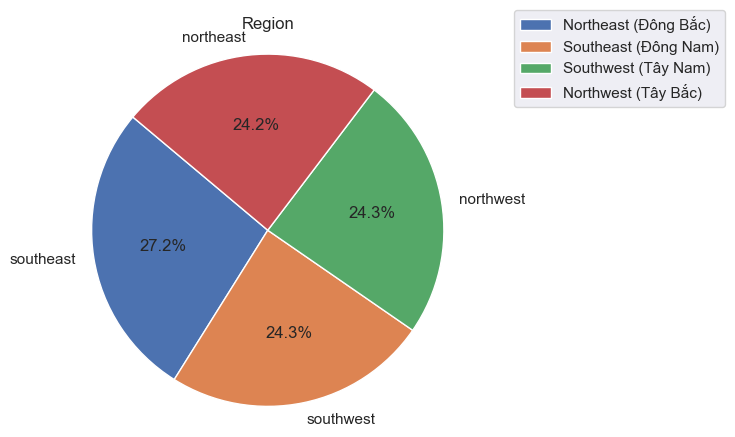

In [18]:
# region column
region_counts = insurance['region'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Region')
plt.axis('equal') 
labels = ['Northeast (Đông Bắc)', 'Southeast (Đông Nam)', 'Southwest (Tây Nam)', 'Northwest (Tây Bắc)']
plt.legend(labels, loc='lower right', bbox_to_anchor=(1.7, 0.8))
plt.show()

In [20]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

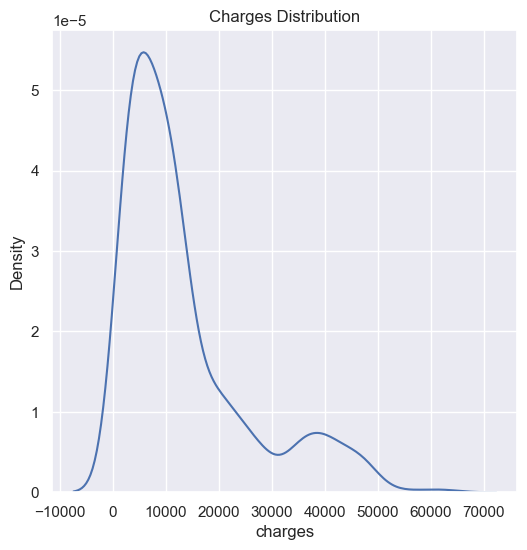

In [21]:
plt.figure(figsize=(6,6))
sns.kdeplot(insurance['charges'])
plt.title('Charges Distribution')
plt.show()

In [22]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Encoding the categorical features


In [26]:
1 # encoding sex column
insurance.replace({'sex':{'male':0,'female':1}}, inplace=True)

2 # encoding 'smoker' column
insurance.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

3 # encoding 'region' column
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
# 'đông nam':0,'tây nam':1,'đông bắc':2,'tây bắc'3

#### Splitting the Features and Target

In [27]:
X = insurance.drop(columns='charges', axis=1)
Y = insurance['charges']

In [28]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [29]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Splitting the data into Training data & Testing Data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


In [38]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


### Model tranning

#### Linear Regression

In [39]:
# loading the Linear Regression model
regressor = LinearRegression()

In [40]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [41]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [42]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value of train: ', r2_train)

R squared value of train:  0.7415730843556845


In [43]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [44]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value of test : ', r2_test)

R squared value of test :  0.7661186068101189


In [45]:
# Evaluate MAE on the test set
mae = mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute Error (MAE):', mae)

# # Evaluate MSE on the test set
mse = mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error (MSE):', mse)


Mean Absolute Error (MAE): 4251.180538000688
Mean Squared Error (MSE): 37804245.53227783


#### General assessment:
- The R-squared values show that the model fits well to both training and testing data.
- "MAE and MSE offer additional insights into the accuracy and performance of the model. To provide a more detailed analysis, I will create scatter plots for clearer visualization."

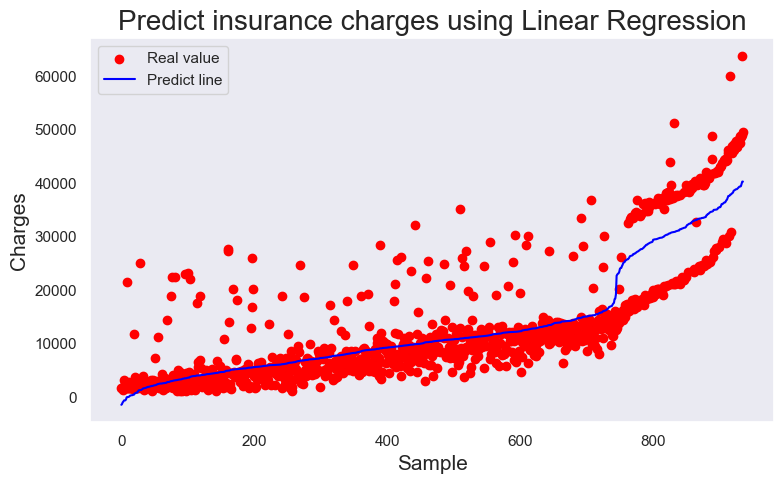

In [48]:
# Sort the data for comparison
y_train_pred = regressor.predict(X_train)
data_to_plot = np.column_stack((y_train_pred, Y_train))
sorted_data = data_to_plot[data_to_plot[:, 0].argsort()]

lst_y_train_pred = sorted_data[:, 0]
lst_y_train = sorted_data[:, 1]

lst_unit_train = np.arange(len(Y_train))

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(lst_unit_train, lst_y_train, color="red", label="Real value")
plt.plot(lst_unit_train, lst_y_train_pred, color="blue", label="Predict line")
plt.title("Predict insurance charges using Linear Regression", fontsize=20)
plt.ylabel("Charges", fontsize=15)
plt.xlabel("Sample", fontsize=15)
plt.grid()
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


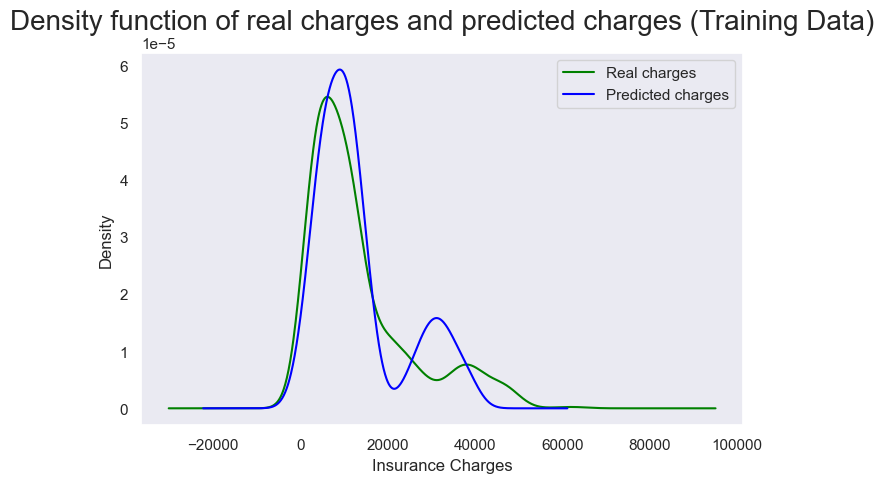

In [52]:
# Create a Pandas Series for the actual and predicted values from the training file
seri_real_train = pd.Series(Y_train)
seri_predict_train = pd.Series(training_data_prediction)

# Generate density histograms for actual and predicted values from the training file
plt.figure(figsize=(7, 5))
seri_real_train.plot.density(color="green")
seri_predict_train.plot.density(color="blue")
plt.xlabel("Insurance Charges")
plt.title("Density function of real charges and predicted charges (Training Data)", fontsize=20)
plt.legend(["Real charges", "Predicted charges"], loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()


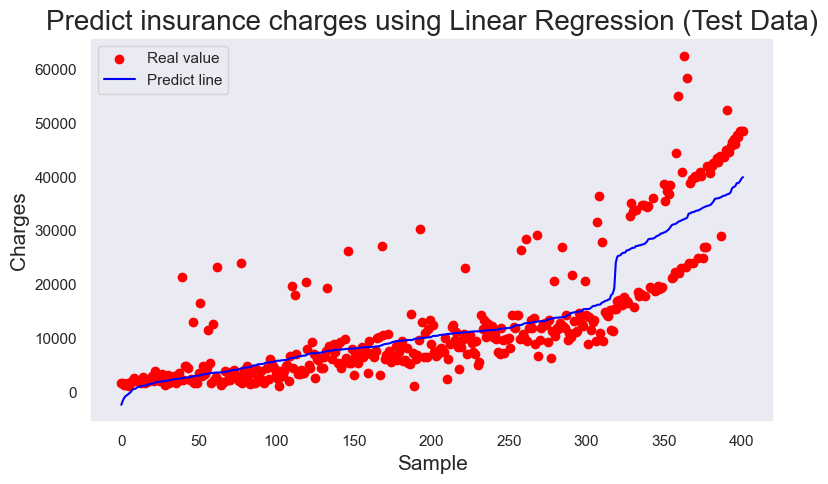

In [53]:
# Sort the data for comparison using test data
test_data_prediction = regressor.predict(X_test)
data_to_plot = np.column_stack((test_data_prediction, Y_test))
sorted_data = data_to_plot[data_to_plot[:, 0].argsort()]

lst_test_data_prediction = sorted_data[:, 0]
lst_Y_test = sorted_data[:, 1]

lst_unit_test = np.arange(len(Y_test))

# Create the scatter plot for test data
plt.figure(figsize=(8, 5))
plt.scatter(lst_unit_test, lst_Y_test, color="red", label="Real value")
plt.plot(lst_unit_test, lst_test_data_prediction, color="blue", label="Predict line")
plt.title("Predict insurance charges using Linear Regression (Test Data)", fontsize=20)
plt.ylabel("Charges", fontsize=15)
plt.xlabel("Sample", fontsize=15)
plt.grid()
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


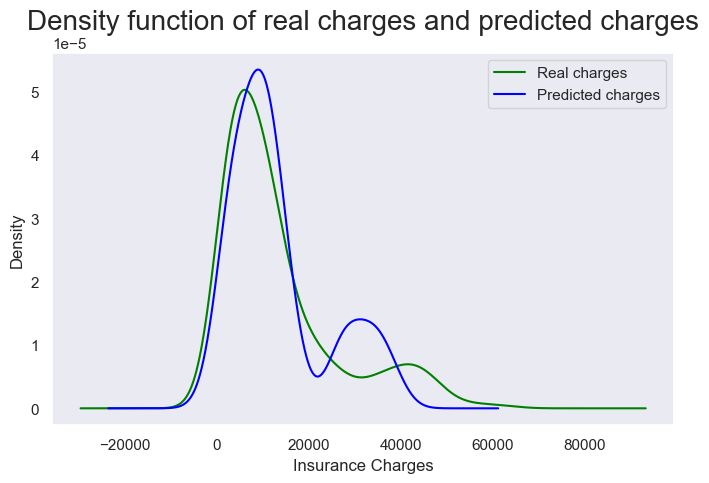

In [54]:
seri_real = pd.Series(Y_test)
seri_predict = pd.Series(test_data_prediction)

# Create a density plot for the real and predicted charges
plt.figure(figsize=(7, 5))
seri_real.plot.density(color="green")
seri_predict.plot.density(color="blue")
plt.xlabel("Insurance Charges")
plt.title("Density function of real charges and predicted charges", fontsize=20)
plt.legend(["Real charges", "Predicted charges"], loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()


####  The actual and predicted values don't differ too much; however, I plan to use another model, RandomForest, to enhance the performance.

### RandomForest Model

In [69]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=2) 

rf_model.fit(X_train, Y_train)


RandomForestRegressor(random_state=2)

In [70]:

rf_predictions = rf_model.predict(X_test)


mae = mean_absolute_error(Y_test, rf_predictions)
mse = mean_squared_error(Y_test, rf_predictions)
r2 = r2_score(Y_test, rf_predictions)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R^2):', r2)


Mean Absolute Error (MAE): 2672.776316512139
Mean Squared Error (MSE): 23605587.12085421
R-squared (R^2): 0.8539606458175005


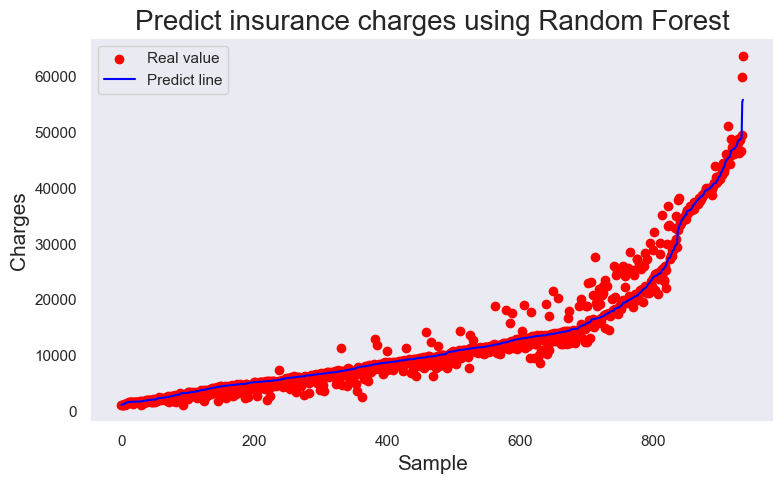

In [71]:
# Sort the data for comparison
rf_predictions = rf_model.predict(X_train)
data_to_plot = np.column_stack((rf_predictions, Y_train))
sorted_data = data_to_plot[data_to_plot[:, 0].argsort()]

lst_rf_predictions = sorted_data[:, 0]
lst_Y_train = sorted_data[:, 1]

lst_unit_train = np.arange(len(Y_train))

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(lst_unit_train, lst_Y_train, color="red", label="Real value")
plt.plot(lst_unit_train, lst_rf_predictions, color="blue", label="Predict line")
plt.title("Predict insurance charges using Random Forest", fontsize=20)
plt.ylabel("Charges", fontsize=15)
plt.xlabel("Sample", fontsize=15)
plt.grid()
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


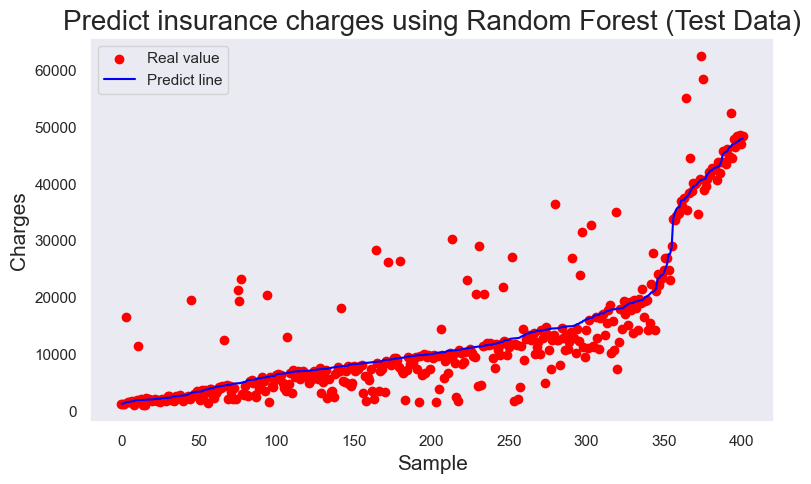

In [72]:
# Sort the data for comparison using test data
rf_predictions_test = rf_optimal.predict(X_test)
data_to_plot = np.column_stack((rf_predictions_test, Y_test))
sorted_data = data_to_plot[data_to_plot[:, 0].argsort()]

lst_rf_predictions_test = sorted_data[:, 0]
lst_Y_test = sorted_data[:, 1]

lst_unit_test = np.arange(len(Y_test))

# Create the scatter plot for test data
plt.figure(figsize=(8, 5))
plt.scatter(lst_unit_test, lst_Y_test, color="red", label="Real value")
plt.plot(lst_unit_test, lst_rf_predictions_test, color="blue", label="Predict line")
plt.title("Predict insurance charges using Random Forest (Test Data)", fontsize=20)
plt.ylabel("Charges", fontsize=15)
plt.xlabel("Sample", fontsize=15)
plt.grid()
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


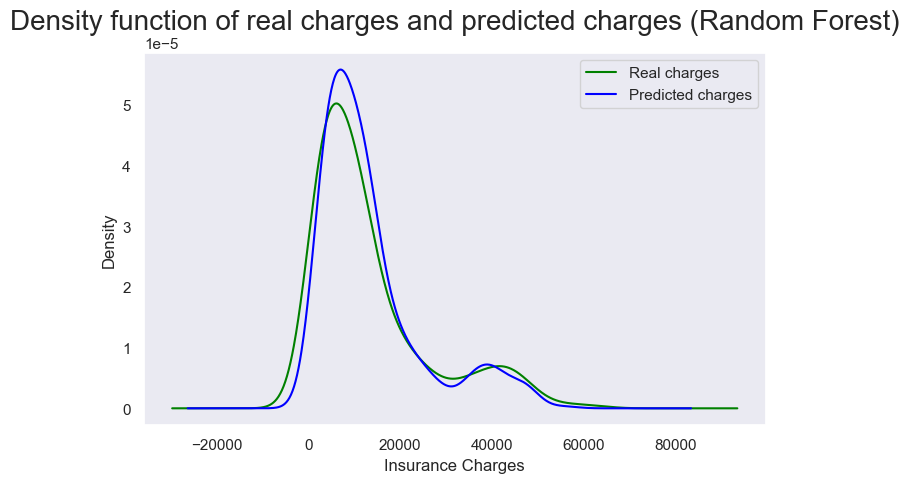

In [73]:


# Create Pandas Series for real and predicted charges
seri_real_rf = pd.Series(Y_test)
seri_predict_rf = pd.Series(rf_predictions)

# Create a density plot for the real and predicted charges
plt.figure(figsize=(7, 5))
seri_real_rf.plot.density(color="green")
seri_predict_rf.plot.density(color="blue")
plt.xlabel("Insurance Charges")
plt.title("Density function of real charges and predicted charges (Random Forest)", fontsize=20)
plt.legend(["Real charges", "Predicted charges"], loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()


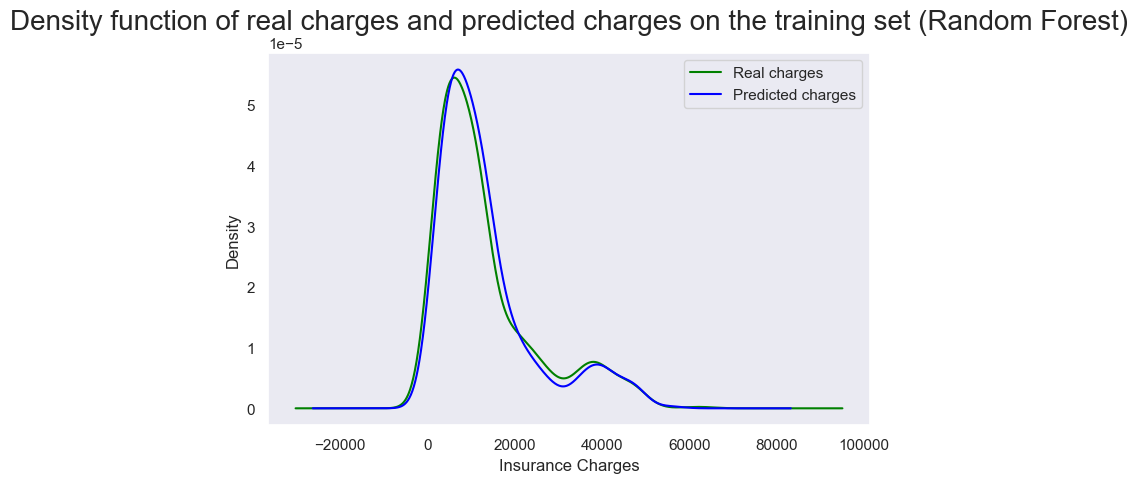

In [74]:
# Create Pandas Series for real and predicted charges on the training set
seri_real_rf_train = pd.Series(Y_train)
seri_predict_rf_train = pd.Series(rf_predictions)

# Create a density plot for the real and predicted charges on the training set
plt.figure(figsize=(7, 5))
seri_real_rf_train.plot.density(color="green")
seri_predict_rf_train.plot.density(color="blue")
plt.xlabel("Insurance Charges")
plt.title("Density function of real charges and predicted charges on the training set (Random Forest)", fontsize=20)
plt.legend(["Real charges", "Predicted charges"], loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()


### Review:

- In the case of Linear Regression, the model yields a Mean Absolute Error (MAE) of 4267.21, Mean Squared Error (MSE) of 38,337,035.49, and an R-squared value (R^2) of 0.744.

- On the other hand, the Random Forest model exhibits a lower MAE of 2795.39, MSE of 24,482,237.31, and a higher R-squared value of 0.837. It is evident that the Random Forest model significantly improves predictive performance.

- These results underscore the superior performance of the Random Forest model in predicting insurance charges. It emerges as a favorable choice for this particular problem, offering enhanced accuracy and making it a compelling option for deployment.

## Hyperparameter Tuning

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Create Random Forest model
rf_model1 = RandomForestRegressor()

# Determine the range of hyperparameters to be fine-tuned
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  # Số cây trong 
    'max_features': ['auto', 'sqrt'],  # Số lượng biến đầu vào tối đa để xem xét cho mỗi nút
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu cần để chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu ở lá của cây
    'bootstrap': [True, False]  # Có nên tái chọn mẫu cho mỗi cây hay không
}

# Perform Random Search
rf_random = RandomizedSearchCV(estimator=rf_model1, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=2)

# Train the model on training data
rf_random.fit(X_train, Y_train)

# Retrieve the best hyperparameter value
best_params = rf_random.best_params_
print("Các siêu tham số tốt nhất:", best_params)

# Test the model with optimal hyperparameters
rf_optimal = RandomForestRegressor(**best_params)
rf_optimal.fit(X_train, Y_train)

# Evaluate model performance
rf_predictions = rf_optimal.predict(X_test)
mae = mean_absolute_error(Y_test, rf_predictions)
mse = mean_squared_error(Y_test, rf_predictions)
r2 = r2_score(Y_test, rf_predictions)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R^2):', r2)


Các siêu tham số tốt nhất: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Mean Absolute Error (MAE): 2491.5911010759896
Mean Squared Error (MSE): 20764413.093864955
R-squared (R^2): 0.8715379768915936


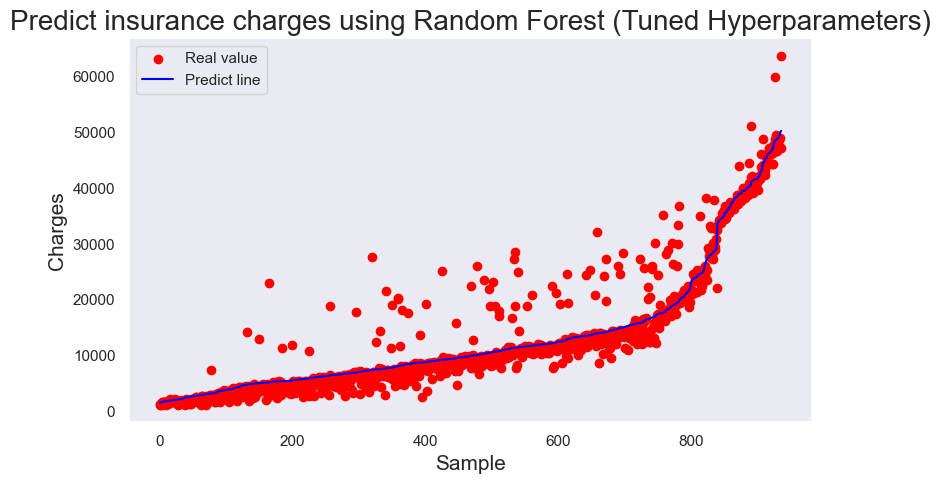

In [80]:
# Sort the data for comparison
rf_predictions = rf_optimal.predict(X_train)  # Sử dụng rf_optimal thay vì rf_model
data_to_plot = np.column_stack((rf_predictions, Y_train))
sorted_data = data_to_plot[data_to_plot[:, 0].argsort()]

lst_rf_predictions = sorted_data[:, 0]
lst_Y_train = sorted_data[:, 1]

lst_unit_train = np.arange(len(Y_train))

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(lst_unit_train, lst_Y_train, color="red", label="Real value")
plt.plot(lst_unit_train, lst_rf_predictions, color="blue", label="Predict line")
plt.title("Predict insurance charges using Random Forest (Tuned Hyperparameters)", fontsize=20)
plt.ylabel("Charges", fontsize=15)
plt.xlabel("Sample", fontsize=15)
plt.grid()
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


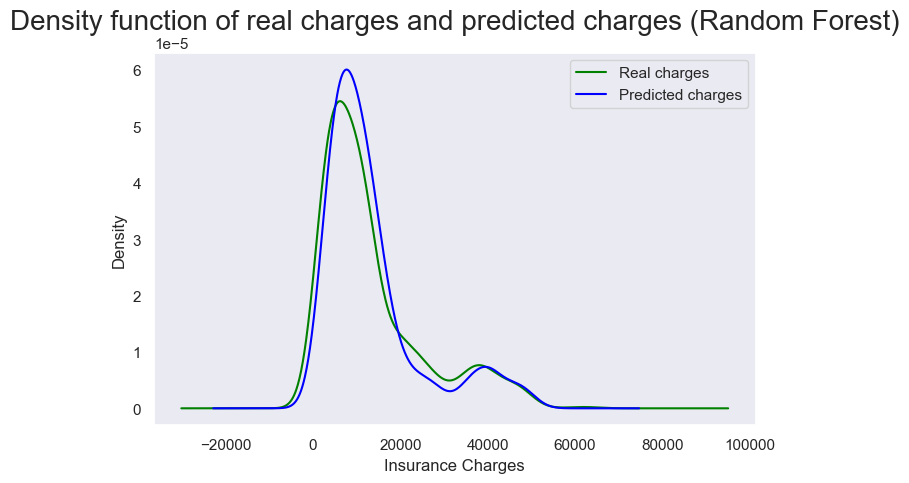

In [81]:
# Create Pandas Series for real and predicted charges
seri_real_rf = pd.Series(Y_train)
seri_predict_rf = pd.Series(rf_predictions)

# Create a density plot for the real and predicted charges
plt.figure(figsize=(7, 5))
seri_real_rf.plot.density(color="green")
seri_predict_rf.plot.density(color="blue")
plt.xlabel("Insurance Charges")
plt.title("Density function of real charges and predicted charges (Random Forest)", fontsize=20)
plt.legend(["Real charges", "Predicted charges"], loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()


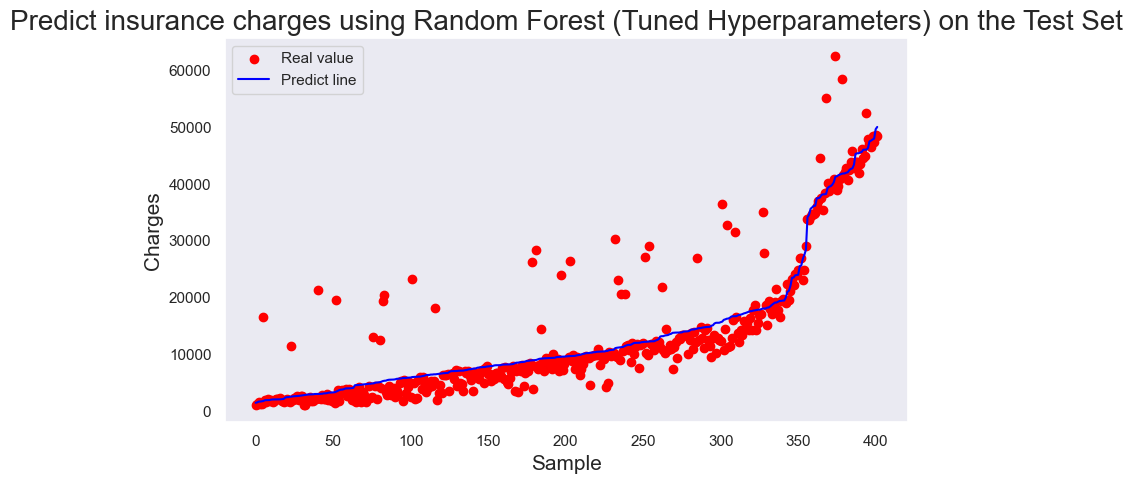

In [82]:
# Sort the data for comparison
rf_predictions = rf_optimal.predict(X_test)  
data_to_plot = np.column_stack((rf_predictions, Y_test))
sorted_data = data_to_plot[data_to_plot[:, 0].argsort()]

lst_rf_predictions = sorted_data[:, 0]
lst_Y_test = sorted_data[:, 1]

lst_unit_test = np.arange(len(Y_test))

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(lst_unit_test, lst_Y_test, color="red", label="Real value")
plt.plot(lst_unit_test, lst_rf_predictions, color="blue", label="Predict line")
plt.title("Predict insurance charges using Random Forest (Tuned Hyperparameters) on the Test Set", fontsize=20)
plt.ylabel("Charges", fontsize=15)
plt.xlabel("Sample", fontsize=15)
plt.grid()
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


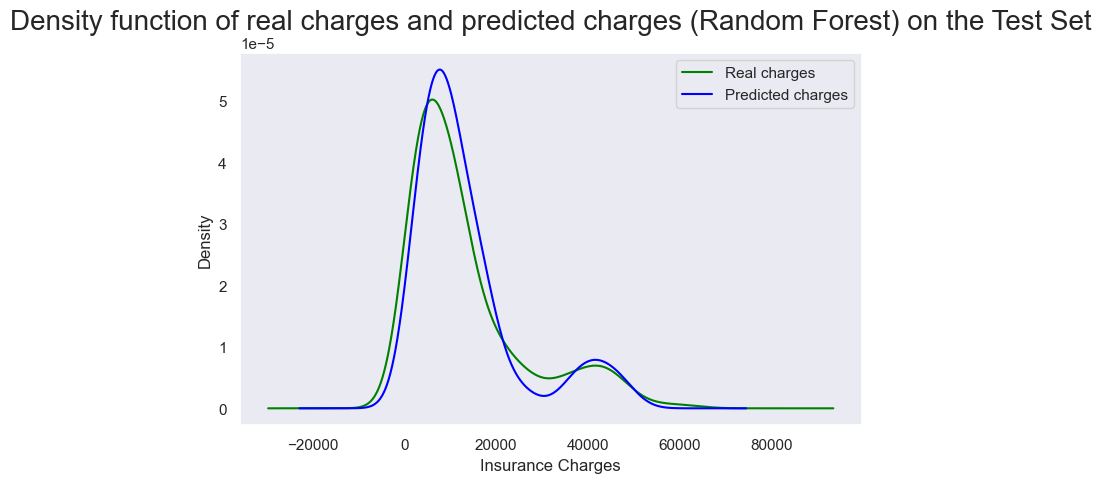

In [83]:
# Create Pandas Series for real and predicted charges on the Test Set
seri_real_rf = pd.Series(Y_test)
seri_predict_rf = pd.Series(rf_predictions)

# Create a density plot for the real and predicted charges
plt.figure(figsize=(7, 5))
seri_real_rf.plot.density(color="green")
seri_predict_rf.plot.density(color="blue")
plt.xlabel("Insurance Charges")
plt.title("Density function of real charges and predicted charges (Random Forest) on the Test Set", fontsize=20)
plt.legend(["Real charges", "Predicted charges"], loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()


### Conclude:
- When comparing the performance between the Linear Regression model and the Random Forest model based on the prediction charts, it is evident that the Random Forest model produces better results. This is noticeable through density plots and scatter plots of actual versus predicted values. These visualizations indicate that the Random Forest model performs better in predicting values compared to the Linear Regression model.

- When comparing the Random Forest model with hyperparameter tuning to the untuned Random Forest model, the results are not as favorable as expected. There could be several reasons for this, such as insufficient data or inappropriate hyperparameter values during tuning. Consequently, the tuned model may not outperform the untuned one. It's worth noting that hyperparameter tuning does not always guarantee improved results and may not be beneficial in every scenario.